In [71]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os

In [2]:
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

5.537956861476521e-213
9.999999531039165
[[ 1.01815172e+00  0.00000000e+00 -1.86264515e-08 ... -1.77635684e-14
  -8.88178420e-16  2.84217094e-14]
 [ 6.19631374e-09  1.01815172e+00 -1.75199509e-09 ... -4.26325641e-14
  -1.06581410e-14  4.26325641e-14]
 [ 1.45407066e-08 -3.73034623e-08  1.01815178e+00 ... -2.13162821e-14
  -1.15463195e-14  7.10542736e-14]
 ...
 [ 5.59978206e-10  8.64126861e-09 -8.72804737e-08 ...  1.01815172e+00
  -3.28626015e-14 -7.10542736e-14]
 [ 2.38143570e-08  7.53155341e-09 -8.83353494e-08 ... -6.75015599e-14
   1.01815172e+00 -4.26325641e-14]
 [ 3.10043267e-08 -3.15633331e-08 -4.44972442e-08 ... -4.61852778e-14
  -3.10862447e-14  1.01815172e+00]]


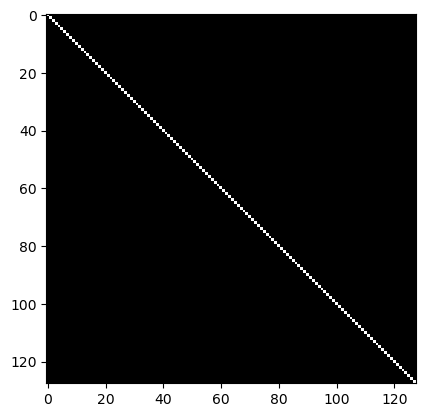

In [47]:
size = 128
num = 10

A = getPositionEncoding(size, size) + (0.01*np.eye(size))
inv = np.linalg.inv(A)

print(np.linalg.det(A))

product = np.matmul(A, np.matmul((10**(1/size))*np.eye(size), inv))
print(np.linalg.det(product))

print(product)

plt.imshow(product, cmap='gray', interpolation='none')
plt.show()

In [73]:
# Generate EG3D Images
from camera_utils import LookAtPoseSampler, FOV_to_intrinsics
cam2world_pose = LookAtPoseSampler.sample(3.14/2, 3.14/2, torch.tensor([0, 0, 0.2], device=device), radius=2.7, device=device)
intrinsics = FOV_to_intrinsics(90, device='cpu')

with open('ffhqrebalanced512-128.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
z = torch.randn([1, G.z_dim]).cuda()    # latent codes
c = torch.cat([cam2world_pose.reshape(-1, 16), intrinsics.reshape(-1, 9)], 1) # camera parameters
img = G(z, c)['image']                           # NCHW, float32, dynamic range [-1, +1], no truncation


/home/stelath/miniconda3/envs/eg3d/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'cam2world_pose' is not defined

In [ ]:
plt.imshow(img)
plt.show()